<a href="https://colab.research.google.com/github/ellaodinec/EllaOdinec/blob/main/Ella_Odinec_Final_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TOPIC OVERVIEW AND RESEARCH

**Topic Overview:**
Every day in the U.S., about 10,000 people are born. Fetal health encompasses the physical and physiological well-being of a developing fetus during pregnancy. During the critical 40-week period of fetal development, regular screenings and tests play a vital role in identifying early warning signs of potential complications, allowing medical experts to intervene if necessary to ensure both maternal and fetal health.
The goal of this project is to work with a real-world healthcare dataset to analyze the features responsible for ensuring good maternal and fetal health during pregnancy. Students will analyze quantitative features from cardiotocograms with the aim of predicting health status from measurements of fetal movements.

**Dataset Description:**
This dataset contains 2,126 observations of 22 variables, capturing quantitative information on fetal health. The features are measurements from cardiotocograms, a medical test used to monitor fetal heartbeat and contractions. The test operates by a technique called ultrasound, where high-frequency sound waves are used to create real-time pictures of a fetus inside the body. An exam histogram of fetal heart rate and movement is produced, and then many features can be extracted from this chart for further analysis. Each row represents one cardiotocogram for one fetus.

**Key Columns:**

Baseline value: Baseline fetal heart rate

Accelerations: Number of accelerations per second

Fetal_movement: Number of fetal movements per second

Uterine_contractions: Number of uterine contractions per second

Light_decelerations: Number of light decelerations per second

Severe_decelerations: Number of severe decelerations per second

Prolonged_decelerations: Number of prolonged decelerations per second

Abnormal_short_term_variability: Percentage of time with abnormal short term variability.

Mean_value_of_short_term_variability

Percentage_of_time_with_abnormal_long_term_variability

Mean_value_of_long_term_variability

Histogram_width: Range between highest and lowest histogram values

Histogram_min: Lowest value in the histogram

Histogram_max: Highest value in the histogram

Histogram_number_of_peaks: Count of distinct peaks in the histogram

Histogram_number_of_zeroes: Number of zero-frequency bins in histogram

Histogram_mode: Most frequent value in the histogram

Histogram_mean: Average value of histogram data

Histogram_median: Middle value of histogram data

Histogram_median (duplicate): Same as above

Histogram_variance: Spread of values in the histogram

Histogram_tendency: Skew or direction of
histogram distribution

Fetal_health: 1 - Normal; 2 - Suspect; 3 - Pathological


**Variable Research**

fetal decleration - temporary but distinct decreases of the fetal heart rate (FHR) identified during electronic fetal heart monitoring
histogram

histogram - a graphical representation of fetal measurements, often used in ultrasound imaging to assess various aspects of fetal development and health --> heart rate

# DATA SET AND LIBRARIES

In [ ]:
#Libraries
import warnings
warnings.filterwarnings('ignore')

!pip install pandas
import pandas as pd

!pip install numpy
import numpy as np

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install scikit-learn
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest

import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer, fetch_california_housing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import ttest_ind, ttest_rel

In [ ]:
df  = pd.read_csv('/content/fetal_health.csv')
print(df.head())

   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0

# RESEARCH QUESTION AND HYPOTHESIS

- What do decelerations tell us about fetal health?
- How do decelerations connect to fetal health?
- How does abnormal variability impact fetal health?
- How do features of a histogram connect to fetal health?
- The purpose of this study is to determine if abnormal heart rate variability of a fetus impacts fetal health.
- What role does abnormal heart rate variability of a fetus play in fetal health?
- How well can you predict a fetus' health by using abnormal heart rate variability variables?
- How well can a heart rate histogram be used to predict a fetus' health?
- where did the histogram data come from?

- Impact of declerations on fetus health

# EXPLORATORY DATA ANALYSIS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

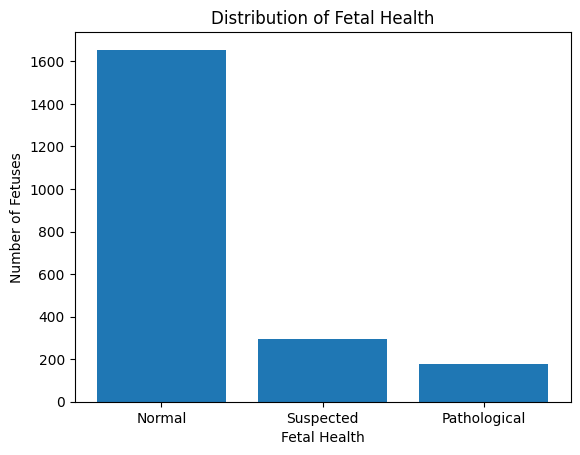

In [ ]:
categories = ['Normal', 'Suspected', 'Pathological']
bars = df['fetal_health'].value_counts()

plt.bar(categories, bars)
plt.ylabel("Number of Fetuses")
plt.xlabel("Fetal Health")
plt.title("Distribution of Fetal Health")
plt.show()

In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


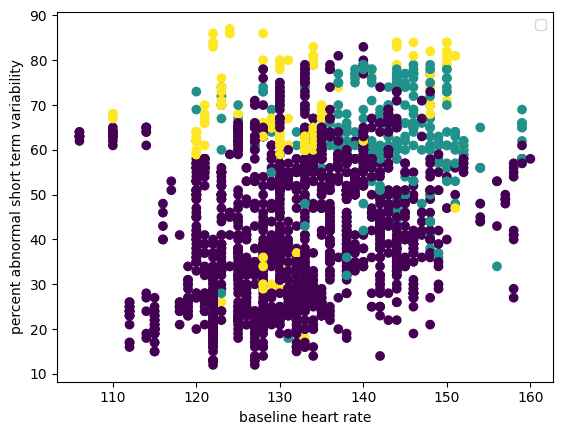

In [ ]:
plt.scatter(df['baseline value'], df['abnormal_short_term_variability'], c=df['fetal_health'])
plt.legend()
plt.ylabel("percent abnormal short term variability")
plt.xlabel("baseline heart rate")
plt.show()

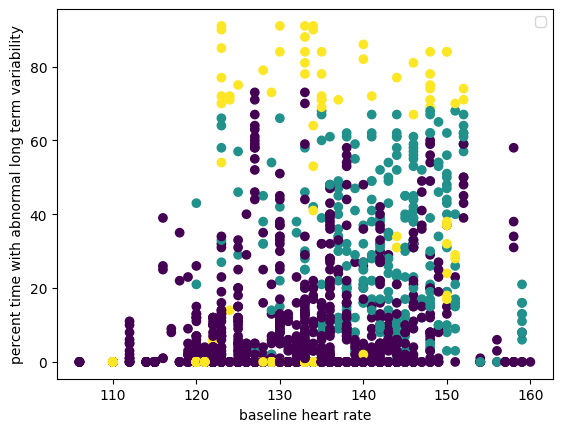

In [ ]:
plt.scatter(df['baseline value'], df['percentage_of_time_with_abnormal_long_term_variability'], c=df['fetal_health'])
plt.legend()
plt.ylabel("percent time with abnormal long term variability")
plt.xlabel("baseline heart rate")
plt.show()

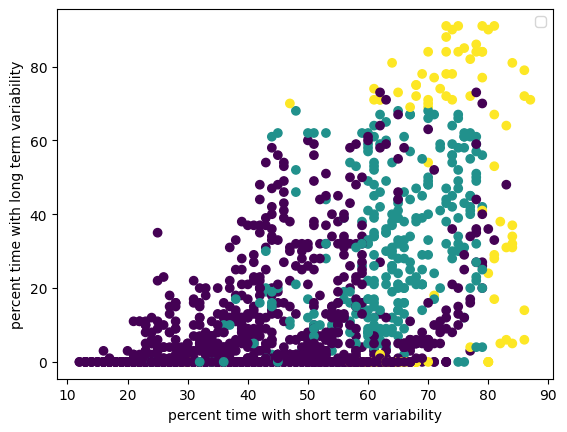

In [ ]:
plt.scatter(df['abnormal_short_term_variability'], df['percentage_of_time_with_abnormal_long_term_variability'], c=df['fetal_health'])
plt.legend()
plt.ylabel("percent time with long term variability")
plt.xlabel("percent time with short term variability")
plt.show()

variability seems to play a role in the health of a fetus

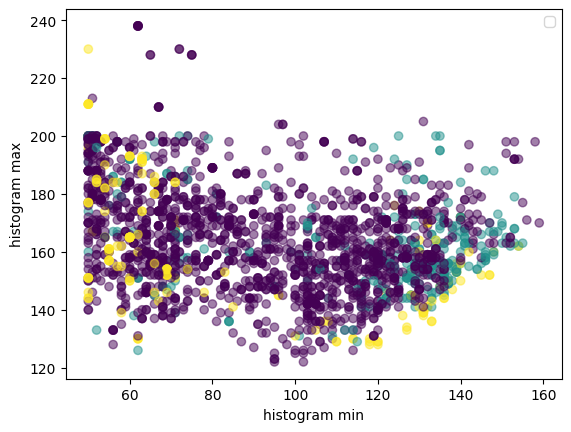

In [ ]:
plt.scatter(df['histogram_min'], df['histogram_max'], c=df['fetal_health'], alpha=0.5)
plt.legend()
plt.ylabel("histogram max")
plt.xlabel("histogram min")
plt.show()

In [ ]:
dff = df[df['fetal_health'] == 1]
print(dff['abnormal_short_term_variability'].mean())
dfff = df[df['fetal_health'] == 2]
print(dfff['abnormal_short_term_variability'].mean())
dffff = df[df['fetal_health'] == 3]
print(dffff['abnormal_short_term_variability'].mean())

42.465861027190336
61.90169491525424
64.53977272727273


# STATISTICAL ANALYSIS AND MACHINE LEARNING MODELS

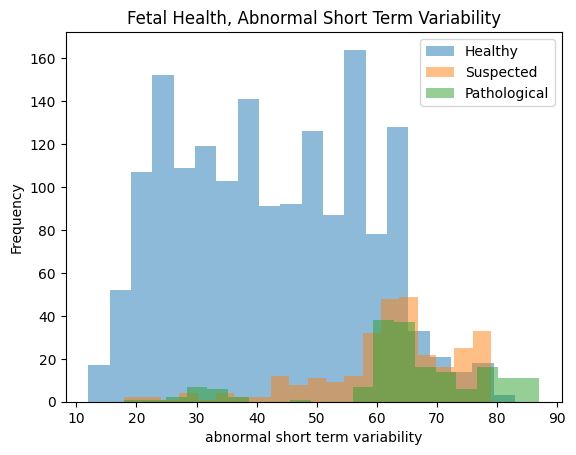

In [ ]:
plt.hist(df[df['fetal_health'] == 1]['abnormal_short_term_variability'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['abnormal_short_term_variability'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['abnormal_short_term_variability'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Abnormal Short Term Variability")
plt.xlabel('abnormal short term variability')
plt.ylabel('Frequency')

plt.show()

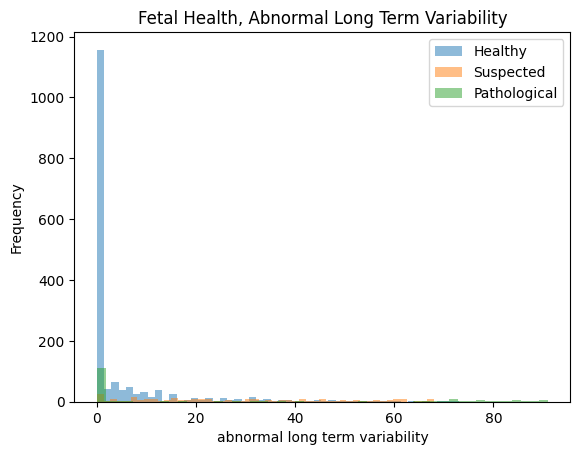

In [ ]:
plt.hist(df[df['fetal_health'] == 1]['percentage_of_time_with_abnormal_long_term_variability'], bins=50, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['percentage_of_time_with_abnormal_long_term_variability'], bins=50, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['percentage_of_time_with_abnormal_long_term_variability'], bins=50, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Abnormal Long Term Variability")
plt.xlabel('abnormal long term variability')
plt.ylabel('Frequency')

plt.show()

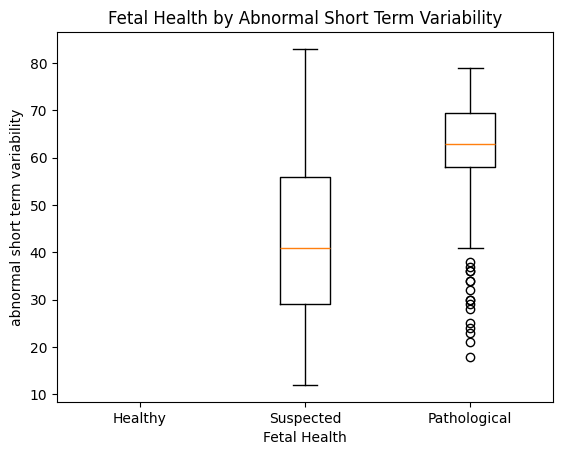

In [ ]:
species = [df[df['fetal_health'] == i]['abnormal_short_term_variability'] for i in range(3)]

plt.boxplot(species, labels=['Healthy', 'Suspected', 'Pathological'])

plt.title("Fetal Health by Abnormal Short Term Variability")
plt.xlabel('Fetal Health')
plt.ylabel('abnormal short term variability')

plt.show()

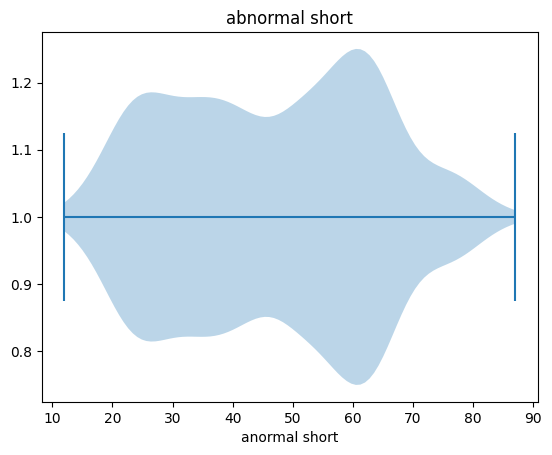

In [ ]:
plt.violinplot(df['abnormal_short_term_variability'], vert=False)
plt.title("abnormal short")
plt.xlabel('anormal short')
plt.show()

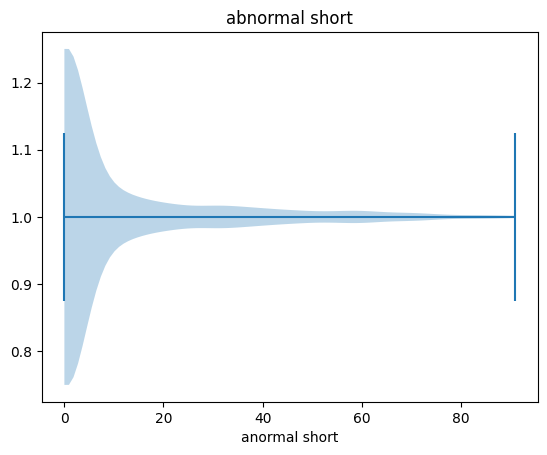

In [ ]:
plt.violinplot(df['percentage_of_time_with_abnormal_long_term_variability'], vert=False)
plt.title("abnormal short")
plt.xlabel('anormal short')
plt.show()

In [ ]:
le = LabelEncoder()
df['abnormal_short_term_variability_new'] = le.fit_transform(df['abnormal_short_term_variability'])
df['fetal_health_new'] = le.fit_transform(df['fetal_health'])

chi2_stat, p_val = chi2(df[['abnormal_short_term_variability_new']], df['fetal_health_new'])

print(f"The chi squared value is {chi2_stat[0]}, The p-value is {p_val[0]}")

threshold = 0.05
if p_val < threshold:
  print("Reject HO/ Accept H1")
else:
  print("Accept H0/Reject H1")

The chi squared value is 4387.2968307581705, The p-value is 0.0
Reject HO/ Accept H1


In [ ]:
le = LabelEncoder()
df['percentage_of_time_with_abnormal_long_term_variability_new'] = le.fit_transform(df['percentage_of_time_with_abnormal_long_term_variability'])
df['fetal_health_new'] = le.fit_transform(df['fetal_health'])

chi2_stat, p_val = chi2(df[['percentage_of_time_with_abnormal_long_term_variability_new']], df['fetal_health_new'])

print(f"The chi squared value is {chi2_stat[0]}, The p-value is {p_val[0]}")

threshold = 0.05
if p_val < threshold:
  print("Reject HO/ Accept H1")
else:
  print("Accept H0/Reject H1")

The chi squared value is 17799.266804970764, The p-value is 0.0
Reject HO/ Accept H1


In [ ]:
le = LabelEncoder()
df['histogram_max_new'] = le.fit_transform(df['histogram_max'])
df['fetal_health_new'] = le.fit_transform(df['fetal_health'])

chi2_stat, p_val = chi2(df[['histogram_max_new']], df['fetal_health_new'])

print(f"The chi squared value is {chi2_stat[0]}, The p-value is {p_val[0]}")

threshold = 0.05
if p_val < threshold:
  print("Reject HO/ Accept H1")
else:
  print("Accept H0/Reject H1")

The chi squared value is 35.476663052932665, The p-value is 1.9785202513227083e-08
Reject HO/ Accept H1


Accuracy Score:  0.8896713615023474


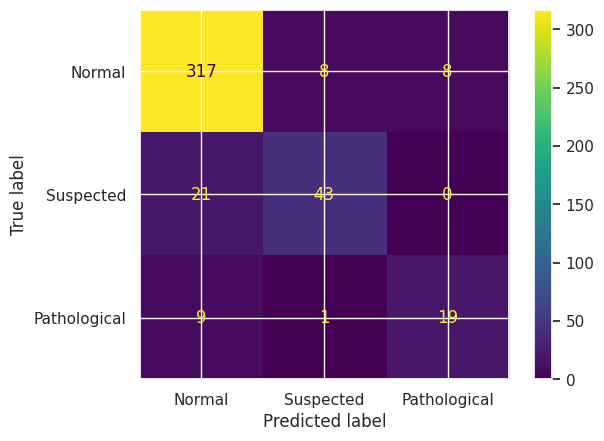

In [ ]:

features = df[['percentage_of_time_with_abnormal_long_term_variability', 'abnormal_short_term_variability']]
label = df['fetal_health']

X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5)

model.fit(X_train, y_train)
predict = model.predict(X_test)

print("Accuracy Score: ", metrics.accuracy_score(y_test, predict))

metrics.ConfusionMatrixDisplay.from_predictions(y_test, predict, display_labels=["Normal", "Suspected", "Pathological"])



{1: np.float64(83.56807511737088), 3: np.float64(88.02816901408451), 5: np.float64(88.96713615023474), 7: np.float64(87.32394366197182), 9: np.float64(86.85446009389672), 11: np.float64(87.32394366197182), 13: np.float64(87.55868544600939), 15: np.float64(87.79342723004694), 17: np.float64(88.02816901408451), 19: np.float64(87.55868544600939), 21: np.float64(88.02816901408451), 23: np.float64(87.79342723004694), 25: np.float64(87.79342723004694), 27: np.float64(88.49765258215963), 29: np.float64(88.02816901408451), 31: np.float64(88.26291079812206), 33: np.float64(88.73239436619718), 35: np.float64(88.26291079812206), 37: np.float64(88.49765258215963), 39: np.float64(88.26291079812206), 41: np.float64(88.02816901408451), 43: np.float64(87.79342723004694), 45: np.float64(87.79342723004694), 47: np.float64(88.26291079812206), 49: np.float64(88.26291079812206)}


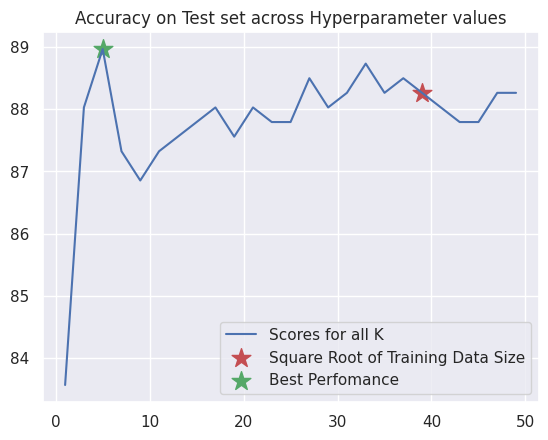

Top score of optimal classifier: 88.96713615023474
Best Value of K to use 5


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[['abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability']], df[['fetal_health']],
                                      test_size=0.2, random_state=42)

# Hyperparameter tuning
scores = {}
for n in range(1,50,2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')

# ADDING THE PERFORMANCE FOR K = SQRT SIZE FOR REFERENCE
k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Best Value of K to use " + str(best_k))

SyntaxError: positional argument follows keyword argument (ipython-input-46-952794981.py, line 2)

# REFINED VISUALIZATIONS